<img src = 'imagens/logo.jpg'>

# <center><font color = #0f4e8c> Regressão Logística

## <font color = #0f4e8c>Sumário
    
1. [Modelos Lineares Generalizados](#first-bullet)
2. [Regressão Logística](#second-bullet)
    
    2.1 [Estimando coeficientes](#third-bullet)
    
    2.1.1 [Máxima Verossimilhança](#fourth-bullet)
    
    2.2 [Chances (Odds), Log-Odds e interpretação do modelo](#fifth-bullet)
    
3. [Implementação](#sixth-bullet)
    
    3.1 [Análise Exploratória dos Dados](#seventh-bullet)
    
    3.2 [Pré-Processamento](#eighth-bullet)
    
4. [Avaliação](#ninth-bullet)


## <font color = #0f4e8c> O que é?

A regressão logística é um tipo de modelo da família dos ***Modelos Lineares Generalizados*** (*Generalized Linear Models - GLM*).

Modelos lineares são bons para descrever eventos com variáveis resposta contínuas. Porém, quando nossa variável resposta segue outra distribuição que não contínua, os modelos lineares não performam de maneira adequada.

Vamos ver um exemplo de como a regressão linear se comporta quando estamos tentando prever uma variável binária $(0\space;1)$.

Abaixo temos um gráfico de uma variável $y$ binária por uma variável $x$ discreta, com a reta de melhor ajuste da regressão representada em vermelho.

<img src = 'imagens/bin-lin.png'>

Podemos observar que a reta da regressão continua indefinidamente nos extremos. Como a nossa variável só possui dois valores possíveis, qualquer valor fora do intervalo $[0;1]$ não faz sentido.

De maneira geral, vemos que o modelo linear não se ajusta bem quando lidamos com variáveis resposta binárias. Isso não significa que devamos descartá-lo.

## <font color = #0f4e8c>1. Modelos Lineares Generalizados - GLMs<a class="anchor" id="first-bullet"></a>

Modelos Lineares Generalizados são uma maneira de contornar esta situação.

Eles possuem 3 componentes gerais:
1. **Preditor Linear** ($\beta_0+\beta_1 X$)
    * Função linear que relaciona as variáveis preditoras com a dependente


2. **Função de Link** $\left(\eta \space | \space g(\mu) \right)$
    * Função que liga o preditor linear a um componente aleatório que segue outra distribuição.


3. **Componente Aleatório / Distribuição de Probabilidade**
    * Distribuição de probabilidades que descreve a variável dependente. No caso de modelos lineares, é a distribuição Normal (Gaussiana), para variáveis binárias, é a distribuição <font color = 'bllue'>*Binomial*.

A ideia básica é utilizar uma função que transforma o modelo, de forma que a sua saída siga outra distribuição que não a Normal.

Pensando nos três componentes citados acima, utilizamos uma ***função de link*** para transformar o ***preditor linear***, fazendo com que sua saída siga uma ***distribuição de probabilidade*** diferente.

## <font color = #0f4e8c>2. Regressão Logística<a class="anchor" id="second-bullet"></a>

A regressão logística é um caso de modelo linear generalizado. Nela, transformamos o preditor da regressão linear ($\beta_0 + \beta_1X_1$) por meio de uma ***função sigmóide***. Uma das características desta família de funções, e a razão pelo qual a usamos, é que ela poduz saídas dentro do intervalo $[0;1]$ que podem ser interpretadas como probabiliidades.

A sigmóide que utilizamos, neste caso, é a <font color = #0f4e8c>***logística***:

### <center>$sig(x) = \frac{1}{1 + e^{-z}}\quad \quad (1.1)$

Abaixo temos um gráfico mostrando uma função logística aplicada a uma variável contínua:

<img src = 'imagens/sigmoide.png'>

Podemos ver que ela segue um formato de 'S', limitando os valores ao intervalo de $[0;1]$.

Quando substituímos $z$ pelo preditor linear, temos a equação do modelo:

## <center>$\hat{y} = p(X) = \frac{1}{1+e^{-\left(\beta_0+\beta_1X_1\right)}} = \frac{e^{\left(\beta_0+\beta_1X_1\right)}}{1+e^{\left(\beta_0+\beta_1X_1\right)}}\quad \quad (1.2)$<a class="anchor" id="first-bullet"></a>

Dessa forma, as probabilidades previstas pelo nosso modelos cairão sempre dentro do intervalo $[0;1]$.

Com isso podemos estabelecer um *limite (threshold)* . Todos os pontos com probabilidade prevista acima deste limite serão classificados como a sendo da classe $1$, e todos abaixo como da classe $0$.

<br>

### <font color = #0f4e8c>2.1 Estimando coeficientes<a class="anchor" id="third-bullet"></a>

Agora que temos uma forma de limitar a saída, vamos falar sobre como estimar os coeficientes do modelo.

Assim como na regressão linear, a logística possui uma *função de custo* ou de *perda* que é utilizada para determinar o valor dos coeficientes.

Relembrando a equação da RSS:

## <center>$ RSS(\hat\beta) = \sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)^2} = \sum_{i=1}^{n}{\bigg(y_i - \hat\beta_0 - \sum_{j=1}^{p}({\hat\beta_j x_{ij})}\bigg)^2},\quad \quad (1.3)$

podemos ver que o valor das previsões $\hat{y}$ são lineares em $x$. Isso faz com que a $RSS(\hat\beta)$ seja uma função convexa, o que significa que ela possui um *mínimo global*.

Na equação $1.2$, entretanto, vemos que as previsões não são lineares em $x$. Por esse motivo a $RSS(\hat\beta)$ não é convexa, implicando a existência de mínimos locais e um mínimo global.

Por esse motivo não usamos a soma dos quadrados dos resíduos para estimar coeficientes da regressão logística. No lugar dela, utilizamos um método chamado <font color = 'blue'>***Máxima Verossimilhança***.

### <font color = #0f4e8c>2.1.1 Máxima Verossimilhança<a class="anchor" id="fourth-bullet"></a>

<font color = '#098A4D'>**Estimação por Máxima Verossimilhança** (MLE) <font color = 'black'>é uma técnica de inferência muito utilizada na estatística inferêncial.

A diferença entre <font color = 'blue'>**probabilidade ($P(X)$)** <font color = 'black'>e <font color = 'red'>**verossimilhança ($L(\theta)$)** <font color = 'black'> é sutil, porém precisamos ter ela clara. A <font color = 'blue'>primeira<font color = 'black'> se refere à chance de observar um determinado resultado dado um ou mais parâmetros. A <font color = 'red'>segunda<font color = 'black'> se preocupa em determinar o quão confiáveis são os parâmetros de um modelo dada uma amostra.

De uma forma geral, e estimação por máxima verossimilhança busca uma combinação de parâmetros que maximize a probabilidade das observações pertencerem à classe atribuídas a elas.

Como esta técnica trabalha com probabilidades, devemos assumir uma distribuição para começarmos. Vimos no início da aula que para problemas de classificação a distribuição mais comum é a Binomial.

Na distribuição Binomial cada observação é um evento de *Bernoulli*, ou seja, cada observação tem uma probabilidade $p$ de acontecer e $1-p$ de não acontecer. Aqui, o único parâmetro que define a distribuição é $p$.

Podemos representar a probabilidade de uma observação da amostra pertencer à uma determinada classe como:

## <center>$ P(y_i = k|x_i) = f(x_i; \theta) = p^{y_i}\cdot(1-p)^{1-y_i} ;\quad \quad (1.4)$

<center><font size = 2>"Probabilidade de $y_i$ ser da classe $k$, dado $x_i$"

Nesta equação, $f(x_i; \theta)$ representa uma *Função Massa de Probabilidades (PMF)* no ponto $x_i$ definida por um parâmetro $\theta$, neste caso, $p$.

Como estamos trabalhando com uma amostra aleatória, podemos assumir que a probabilidade conjunta da amostra é a multiplicação das probabilidades de cada observação individual ($1.4$).

### <center>$ P(X) = P(X_1 = x_1, X_2=x_2, \cdots, X_n=x_n) = f(x_1;p)\cdot f(x_2;p)\cdots f(x_n;p) \implies $

## <center>$ \prod_{i=1}^{n}{f(x_i;p}); \quad (1.5) $

Substituindo ($1.4$) em ($1.5$):

### <center>$ L(p) = \prod_{i=1}^{n}{f(x_i;p)} \implies p^{y_1}(1-p)^{1-y_1}\cdot p^{y_2}(1-p)^{1-y_2} \cdots p^{y_n}(1-p)^{1-y_n} \implies$

## <center>$ L(p) =  p^{\sum_{i=1}^{n}{y_i}}\cdot(1-p)^{\sum_{i=1}^{n}{(1-y_i)}} $

Aplicando uma transformação logarítimica:

###  <center>$ \log{L(p)} = \log\left({p^{\sum_{i=1}^{n}{y_i}}\cdot(1-p)^{\sum_{i=1}^{n}{(1-y_i)}}}\right) $

Utilizando as propriedades dos logaritmos:

### <center>$ \log{L(p)} = \sum_{i=1}^{n}{y_i}\cdot\log{p} + \sum_{i=1}^{n}{(1-y_i)}\cdot\log{(1-p)} $

Podemos reescrever o parâmetro $p$ como uma função de $x_i$ e $\beta$**:** $p(x_i;\beta)$. Substituindo:

### <center>$ \ell(\beta) = \sum_{i=1}^{n}{y_i}\sum_{i=1}^{n}{\log{p(x_i;\beta)}} + \sum_{i=1}^{n}{(1-y_i)}\sum_{i=1}^{n}{(1-p(x_i;\beta))} \implies $

### <center>$ \ell(\beta) = \sum_{i=1}^{n}{\Bigl\{y_i\log{p(x_i;\beta)} + (1-y_i)\log({1-p(x_i;\beta)})\Bigr\}} \quad \quad (1.6) $

A equação ($1.6$) representa a Log-Verossimilhança do modelo em função do parâmetro $\beta$, e é a *função de custo* da regressão Logística.

Por fim, maximizamos essa função para chegar ao <font color = '#098A4D'>**Estimador de Máxima Verossimilhança (MLE)**<font color = 'black'>:

### <center>$ \ell(\beta) = \max_{\beta}\Bigl\{\sum_{i=1}^{n}{\bigl\{y_i\log{p(x_i;\beta)} + (1-y_i)\log({1-p(x_i;\beta)})\bigr\}\Bigr\}}\quad \quad (1.7) $

### <font color = #0f4e8c>2.2 Chances (Odds), Log-Odds e interpretação do modelo<a class="anchor" id="fifth-bullet"></a>

Nós costumamos pensar em chance e probabilidade como equivalentes, porém para a estatística eles são conceitos distintos.

Nós calculamos a *probabilidade* como o número de eventos favoráveis divido pelo número de eventos possíveis.

### <center>$probabilidade = \frac{eventos\space favoráveis}{eventos\space possíveis}$

Em um lançamento de dado, por exemplo, a probabilidade de obtermos um 3 é $1$ (apenas um evento favorável) dividido por $6$ (total de eventos possíveis).

<center>$p(3) = \frac{1}{6}$

A *chance*, por sua vez, é calculada como a probabilidade de um evento ocorrer dividido pela possibilidade de este evento não ocorrer.

### <center>$chance = \frac{p(x)}{1 - p(x)}\quad \quad (1.8)$

Pensando no lançamento de dados, a *chance* de tirarmos 3 é:

<center>$odds(3) = \frac{p(3)}{1 - p(3)}\implies \frac{1/6}{1 - 1/6}\implies\frac{1/6}{5/6} =  1/5$

Assim como podemos chegar à chance por meio da probabilidade, também conseguimos calcular a probabilidade através da chance:

<center>$ odds(x) = (1.8) \implies odds(x) - odds(x)\cdot p(x) = p(x)\implies odds(x) = p(x) + odds(x)p(x) $

<center>$\implies odds(x) = p(x)(1 + odds(x)) \implies p(x) = \frac{odds(x)}{1+odds(x)} $

Verificando a validade com o exemplo do dado, temos:

### <center>$ p(3) = \frac{1/5}{1+1/5} = \frac{1/5}{6/5} = \frac{1}{5}\cdot\frac{5}{6} \implies p(3) =  \frac{1}{6}$

<br>
Uma forma de internalizar o conceito de chance é pensar nele como uma medida de frequência:

A chance de tirarmos 3 no lançamento de dados é de **um para cinco**. Isso significa que para cada lançamento resultante em três, cinco resultam em outros números.

<br>

Voltando à função logística ([$1.2$](#first-bullet)), podemos fazer algumas operações e chegar ao seguinte resultado:

## <center>$\frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1X_1}\quad \quad (1.9)$

Vemos que o termo do lado esquerdo representa a chance de um evento ocorrer.

Aplicando uma transformação logarítmica na equação:

## <center>$\log{(\frac{p(X)}{1 - p(X)})} = \beta_0 + \beta_1X_1\quad \quad (2.0)$

Aqui, o termo da esquerda é conhecido como <font color = 'blue'>***log-odds***<font color = 'black'>, ou <font color = 'blue'>***logit*** <font color = 'black'>(também é comum ver o termo *transformação logit*).



Na equação ($1.4$), vemos que para cada unidade de incremento em $X_1$, o logaritmo das chances varia $\beta_1$. Isso é o mesmo que multiplicar as chances (*odds*) por $e^{\beta_1}$.

<br>

## <font color = #0f4e8c>3. Implementação<a class="anchor" id="sixth-bullet"></a>

Para demonstrar a implementação da regressão logística vamos utilizar o conjunto de dados *Winsconsin Breast Cancer Diagnostic Dataset*. Ela está disponível no seu [repositório original](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) e na biblioteca sklearn.

Ele é um conjunto de dados composto por 30 variáveis explicativas numéricas, descrevendo características de tumores, e uma variável alvo categórica: o diagnóstico (0 - Maligno; 1 - Benigno).

In [2]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer

In [3]:
# Baixando dados

X, y = load_breast_cancer(return_X_y = True, as_frame = True)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Podemos ver que algumas variáveis estão em escalas de grandeza diferentes. Grande parte dos modelos requer que as variáveis estejam na mesma escala para obter bons resultados, na regressão logística não é diferente.

Iremos lidar com isto mais tarde.

### <font color = #0f4e8c>3.1 Análise Exploratória dos Dados<a class="anchor" id="seventh-bullet"></a>

In [6]:
y = y.map(lambda x: x - 1 if x == 1 else x + 1)

In [7]:
# Distribuição da variável alvo

y.value_counts()

0    357
1    212
Name: target, dtype: int64

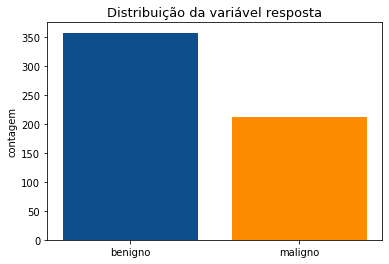

In [8]:
# Visualizando

plt.bar(x = ['benigno', 'maligno'], height = y.value_counts(), color = ['#0f4e8c','darkorange'])

ax = plt.gca()
ax.set_title('Distribuição da variável resposta', fontsize = 13)
ax.set_ylabel('contagem')

plt.show()

Vamos olhar agora para a distribuição das variáveis explicativas. Como todas são contínuas, vou utilizar visualizações como histogramas e gráficos de dispersão.

In [9]:
# Grupos de colunas

cols = X.columns

media = []
erro = []
pior = []

for col in cols:
    if col.startswith('mean'): 
        media.append(col)
    elif col.endswith('error'):
        erro.append(col)
    else:
        pior.append(col)

In [10]:
print(media)
print(erro)
print(pior)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']
['radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']
['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [11]:
# Dataframe para plotagem

df = pd.concat([X, y], axis = 1)

In [12]:
# Função para plotar

def plot_dist(colunas, dados):
    
    fig = plt.figure(figsize = (18,14))
    
    for i, n in enumerate(colunas):
        
        i += 1
        
        ax = fig.add_subplot(4,3,i)
        
        sns.histplot(data = dados, x = n, hue = 'target',hue_order = [1,0], kde = True, stat = 'density', ax = ax)
        
        ax.legend(title = 'alvo', loc = 'upper right', labels = ['Benigno', 'Maligno'])
        
    
    fig.subplots_adjust(hspace = .35)
        
    if n.startswith('mean'):
        
        fig.suptitle('Distribuição das médias', fontsize = 15)
        
    elif n.endswith('error'):
        
        fig.suptitle('Distribuição dos erros', fontsize = 15)
    
    else:
        
        fig.suptitle('Distribuição dos "piores"', fontsize = 15)
        
    plt.show()
    

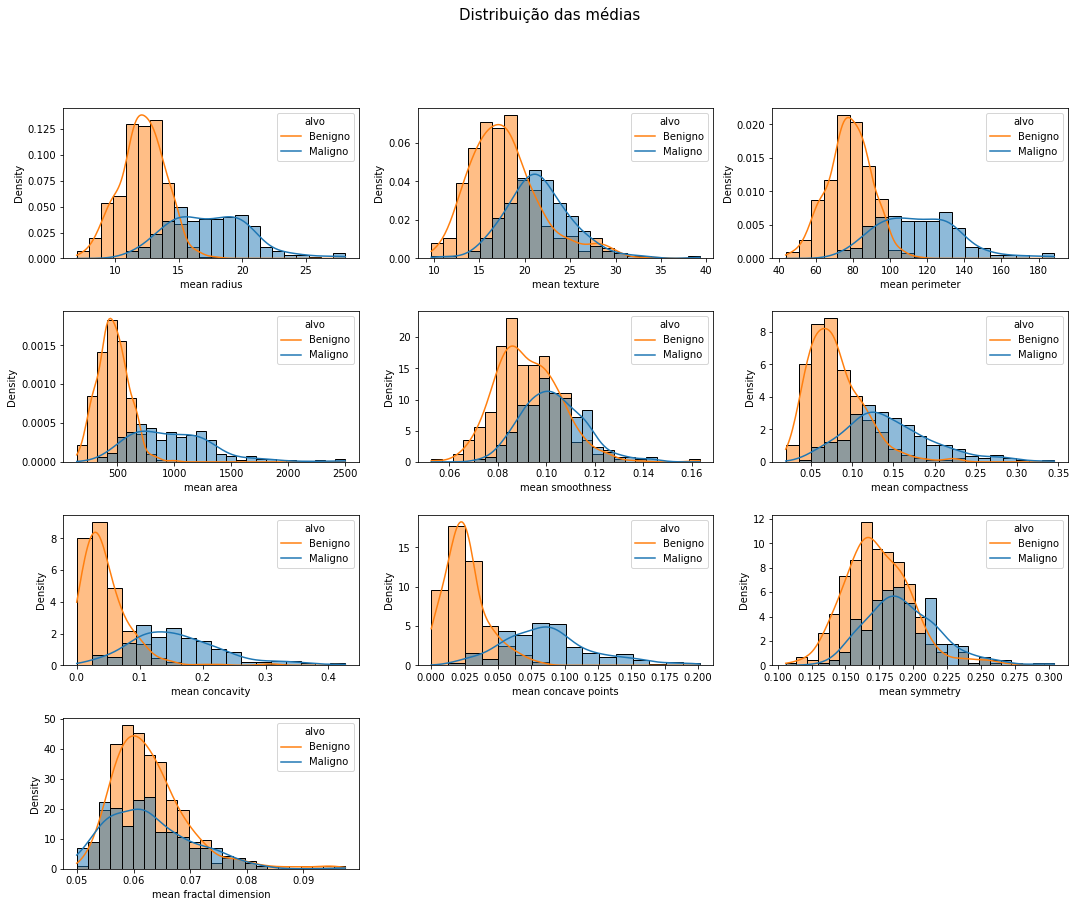

In [13]:
# Distribuição das médias

plot_dist(colunas = media, dados = df)

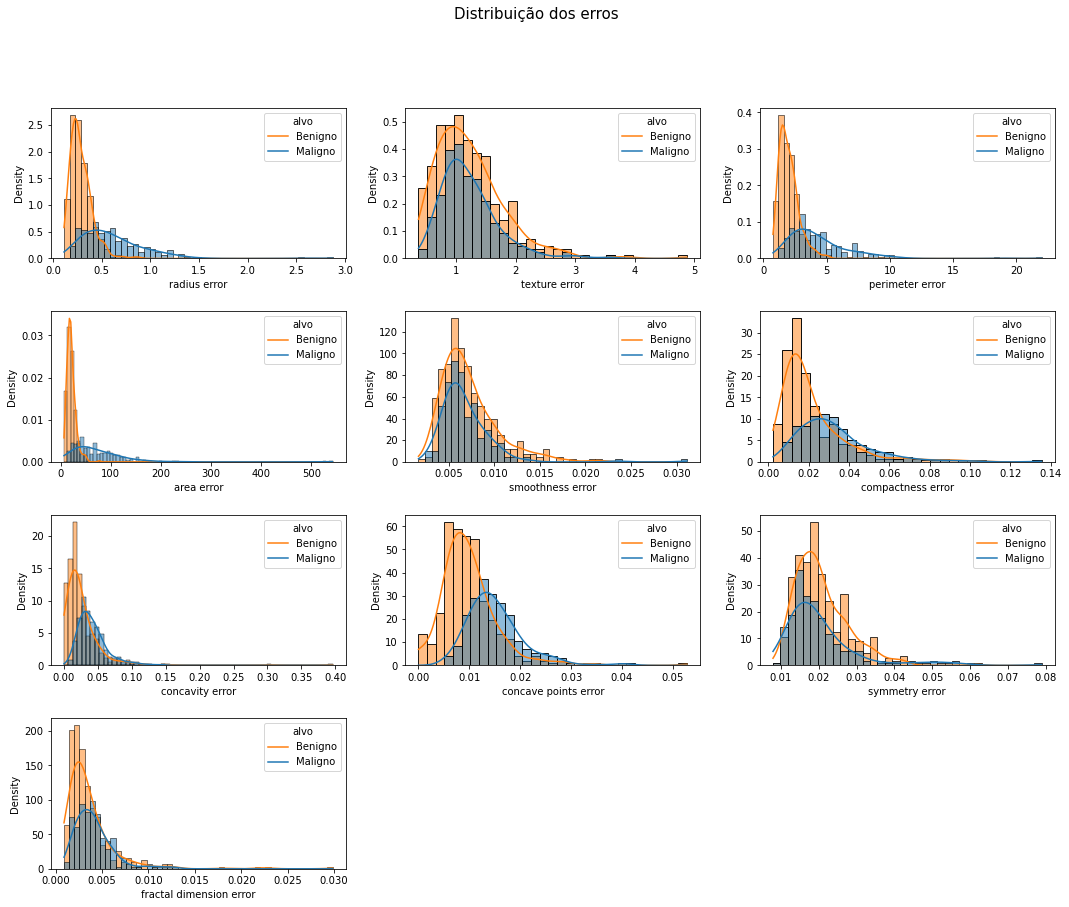

In [14]:
# Distribuição dos erros

plot_dist(colunas = erro, dados = df)

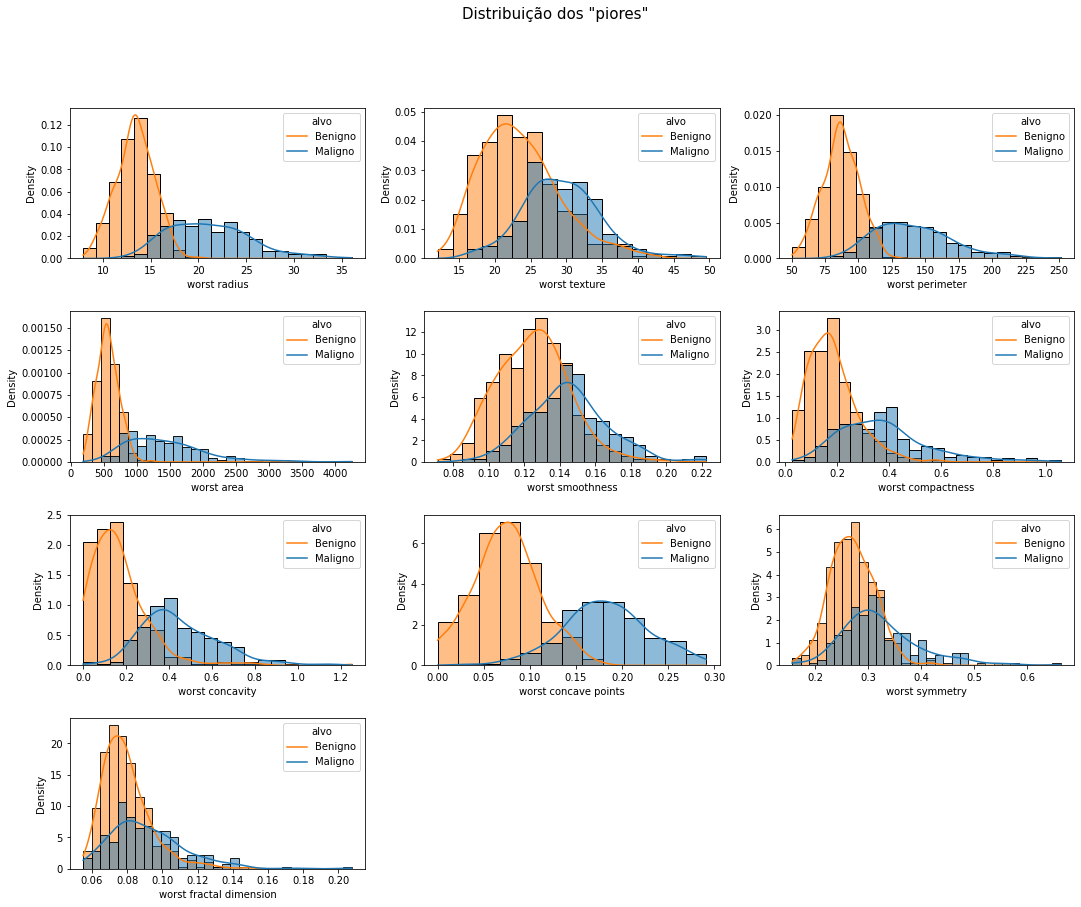

In [15]:
# Distribuição do 'pior'

plot_dist(colunas = pior, dados = df)

Olhando para as distribuições entre os grupos de variáveis percebemos que aquelas relacionadas ao erro não aparentam ter comportamento muito diferente entre as classes resposta.

Os grupos 'média' e 'pior', por outro lado, possuem mais variáveis com distribuições distintas entre as classes resposta. Este é um bom indicativo de que elas serão boas variáveis preditoras.

Vamos olhar agora para a correlação entre os atributos.

In [16]:
# Correlações

def plot_corr(dados):
    
    corr = dados.corr().round(2)

    plt.figure(figsize = (18,13))

    sns.heatmap(corr, annot = True, cmap = 'coolwarm')
    
    plt.show()

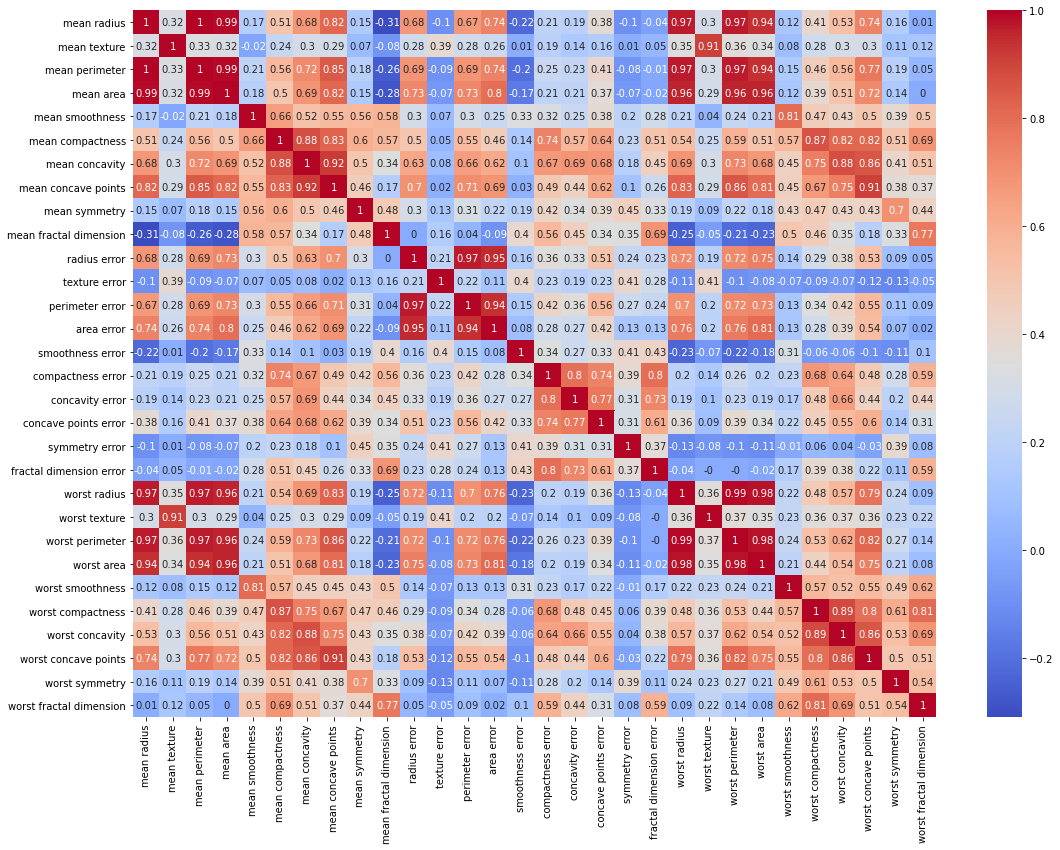

In [17]:
plot_corr(X)

Podemos ver que muitos atributos são correlacinados. Além disso, existem grupos de variáveis com correlação perfeita ou quase perfeita, um grande indicativo de multicolinearidade.

Agora que fizemos uma breve exploração dos dados, temos alguma noção do que deve ser feito:
    
    1. Split em treino e teste;
    2. Normalização dos dados;
    3. Selecionar variáveis;

### <font color = #0f4e8c>3.2 Pré-Processamento<a class="anchor" id="eighth-bullet"></a>

### <font color = #0f4e8c>3.2.1 Split

In [18]:
# Split em treino e test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13)

### <font color = #0f4e8c>3.2.2 Normalização

In [19]:
# Padronização dos dados
# Instanciando objeto StandardScaler
scaler = StandardScaler()

# 'Treinando' no treino e transformando ambos (treino e teste) 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

A normalização dos dados deve ser feita <font color = 'red'>**após**<font color = 'black'> a divisão em conjunto de treino e teste para que não ocorra *vazamento de dados (data leakage)*.

<font color = #0f4e8c>***Data Leakage***<font color = 'black'> ocorre quando informações do conjunto de teste são utilizadas para treinar o modelo. Se fizermos a normalização com o conjunto inteiro, informações do conjunto de teste irão 'vazar' para o treino, tornando os resultados não confiáveis.

### <font color = #0f4e8c>3.3.3 Seleção de Atributos

Existem alguns métodos para selecionar variáveis. Podemos utilizar critérios de informação como *AIC* e *BIC*, eliminação recursiva de atributos, regularização, etc.

Aqui vamos usar a regressão lasso para selecionar os atributos do modelo. 

In [20]:
# Seleção de atributos com regressão lasso e validação cruzada
# Instanciando objeto LassoCV (validação cruzada)
lassocv = LassoCV(n_alphas  = 1000, cv = 15, random_state = 13)

# treinando e obtendo os coeficientes
lassocv.fit(X_train_scaled, y_train)
coeficientes = lassocv.coef_

In [21]:
print(coeficientes)
print(f'número de atributos selecionados: {(coeficientes != 0).sum()}')

[ 0.          0.01351208  0.         -0.08688531  0.02559725 -0.16100645
  0.13368456  0.0962942  -0.0162073  -0.04059343  0.15590975 -0.01468264
 -0.         -0.11158453  0.05244767 -0.         -0.08485313  0.03674495
  0.         -0.01016653  0.48627271  0.05048572  0.         -0.26090739
 -0.         -0.          0.07198824  0.03912112  0.06441643  0.06162707]
número de atributos selecionados: 22


In [22]:
print(f'atributos dropados: {X.columns[coeficientes == 0].values}')

atributos dropados: ['mean radius' 'mean perimeter' 'perimeter error' 'compactness error'
 'symmetry error' 'worst perimeter' 'worst smoothness' 'worst compactness']


In [23]:
# Selecionando colunas no conjunto de dados

X_train_final = X_train_scaled[:, coeficientes != 0]
X_test_final = X_test_scaled[:, coeficientes != 0]

### <font color = #0f4e8c>3.5 Treino e Previsões

In [26]:
# Instanciando o modelo
modelo = LogisticRegression()

# Treinando o modelo 
modelo.fit(X_train_final, y_train)

# Fazendo previsões
y_train_pred = modelo.predict(X_train_final)
y_test_pred = modelo.predict(X_test_final)

## <font color = #0f4e8c>4. Avaliação<a class="anchor" id="ninth-bullet"></a>
---

### <font color = #0f4e8c>4.1 Métricas de Avaliação para classificadores binários
---
    
    - Acurácia;
    - Precisão;
    - Sensitividade;
    - Score F1

Para explicar cada uma delas, vamos pensar que treinamos um modelo para classificar e-mails como *spams* ou não, sendo que $1 \rightarrow spam \space;\space 0 \rightarrow email $.

### <font color = #0f4e8c>4.1.1 Acurácia
$Accuracy =\frac{VP+VN}{VP+VN+FP+FN}$


> Considerando todas as classificações, quantas o modelo acertou.
    
No caso do e-mail: Considerando todas as observações, quantas o modelo classificou corretamente.

### <font color = #0f4e8c>4.1.2 Precisão
$Precision=\frac{VP}{VP+FP}$

> Considerando todas as classificações positivas, quantas são de fato positivas.

No caso do e-mail: Considerando todos os e-mails que o modelo classificou como spam, quantos realmente são spam.

### <font color = #0f4e8c>4.1.3 Sensitividade (Recall)
$Recall=\frac{VP}{VP+FN}$

>Considerando todas as observações positivas, quantas o modelo classificou corretamente. 

No caso do e-mail: Considerando todos os e-mails que são spam, quantos o modelo classificou corretamente como spam.

### <font color = #0f4e8c>4.1.4 F1-Score
$f1score=2\cdot\frac{precisão*recall}{precisão+recall}\implies$ média harmônica da precisão e sensitividade.

In [25]:
# Acurácia média no treino
print(f'A acurácia média do modelo no conjunto de treino foi de: {modelo.score(X_train_final, y_train)}')
print(f'A acurácia média do modelo no conjunto de teste foi de: {modelo.score(X_test_final, y_test)}')

A acurácia média do modelo no conjunto de treino foi de: 0.9882629107981221
A acurácia média do modelo no conjunto de teste foi de: 0.972027972027972


In [30]:
# Métricas no treino
print(f'A precisão do modelo no treino foi de: {precision_score(y_train, y_train_pred)}')
print(f'A sensitividade do modelo no treino foi de: {recall_score(y_train, y_train_pred)}')
print(f'O F1 Score do modelo no treino foi de: {f1_score(y_train, y_train_pred)}')

A precisão do modelo no treino foi de: 0.99375
A sensitividade do modelo no treino foi de: 0.9754601226993865
O F1 Score do modelo no treino foi de: 0.9845201238390093


In [31]:
# Métricas no teste
print(f'A precisão do modelo no treino foi de: {precision_score(y_test, y_test_pred)}')
print(f'A sensitividade do modelo no treino foi de: {recall_score(y_test, y_test_pred)}')
print(f'O F1 Score do modelo no treino foi de: {f1_score(y_test, y_test_pred)}')

A precisão do modelo no treino foi de: 0.9591836734693877
A sensitividade do modelo no treino foi de: 0.9591836734693877
O F1 Score do modelo no treino foi de: 0.9591836734693877


Fazemos a comparação das métricas no treino e no teste para detectar *sobre ajuste (overfitting)* no modelo.

Aqui, como a queda na performance do treino para o teste foi pequena, descartamos esta possibilidade.

In [34]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        94
           1       0.96      0.96      0.96        49

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



### <font color = #0f4e8c>4.2 Matriz de Confusão

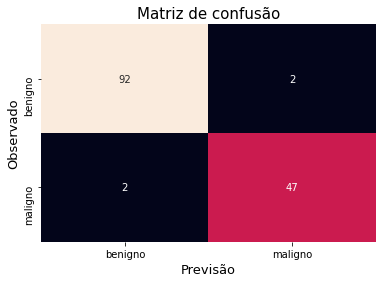

In [35]:
# Matriz de confusão
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, cbar = False, ax = ax)

ax.set_title('Matriz de confusão', fontsize = 15)
ax.set_xlabel('Previsão', fontsize = 13)
ax.set_ylabel('Observado', fontsize = 13)
ax.set_xticklabels(['benigno', 'maligno'])
ax.set_yticklabels(['benigno', 'maligno'])

plt.show()

Olhando a matriz de confusão, vemos que dois tumores malignos foram classificados como benignos e dois benignos como malignos.

Tendo em mente que $1 \rightarrow Maligno \space;\space 0 \rightarrow Benigno$, qual das métricas deve importar mais para nós?

### <font color = #0f4e8c>4.3 ROCC e AUC

A <font color = #0f4e8c>***Receiver Operating Characteristic Curve (ROCC)***<font color = 'black'> é uma métrica para avaliar modelos de classificação. Ela funciona baseada em duas outras métricas: 
    
1) a *Taxa de Verdadeiros Positivos* (**True Positive Rate - TPR**). Ela nada mais é que a métrica ***Recall***, ou *Sensitividade*.
    
Esta métrica nos mostra, dentre todas as *observações* positivas, quantas o modelo classificou corretamente como positivas.
    
2) a *Taxa de Falsos Positivos* (**False Positive Rate - FPR**). Ela nos mostra, dentre todas as *observações* negativas, quantas o modelo classificou erroneamente como sendo positivas.

Como o nome sugere, a métrica é uma curva. No eixo $x$ temos a taxa de falsos positivos (FPR), no eixo $y$ temos a taxa de verdadeiros positivos (TPR).

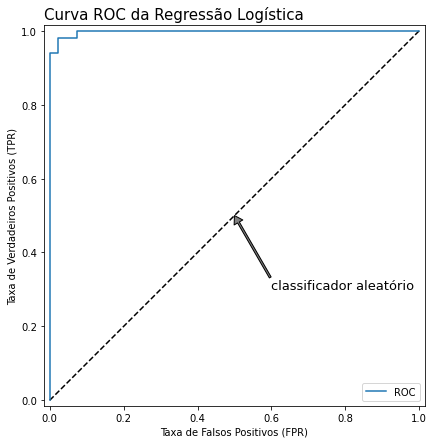

In [36]:
# Obtendo as probabilidades previstas
y_pred_proba = modelo.predict_proba(X_test_final)[:, 1] # .predict_proba(): retorna as probabilidade antes de passar pelo threshold

# Calculando a ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # roc_curve(): retorna o valor da FPR e TPR para vários limites (thresholds)

# Plotando a curva
fig, ax = plt.subplots(figsize = (7,7))

ax.set_aspect('equal')
ax.plot([0,1], [0,1], ls = '--', color = 'k')
ax.plot(fpr, tpr, label = 'ROC')
ax.set_xlabel('Taxa de Falsos Positivos (FPR)')
ax.set_ylabel('Taxa de Verdadeiros Positivos (TPR)')
ax.set_title('Curva ROC da Regressão Logística', loc = 'left', fontsize = 15)
ax.legend()
ax.margins(.015)

# Anotações
seta = {'width': 2,
        'headwidth': 10,
        'headlength': 8,
        'facecolor': 'gray'}
ax.annotate('classificador aleatório', xy = (.5,.5), xytext = (.6,.3), fontsize = 13, arrowprops = seta)


plt.show()

A função `roc_curve()` calcula a FPR e TRP do modelo considerando diferentes limites (*thresholds*) de classificação. Quanto mais afastada da linha do classificador aleatório, melhor o modelo.

Outra métrica derivada da ROCC é a **AUC** (*Area Under the Curve*), ou AUROCC. Como o nome sugere, ela calcula a área abaixo da ROCC. Quanto mais próxima de $1$, melhor o modelo.

Podemos calcular esta métrica utilizando a função `roc_auc_score()`.

In [61]:
# Computando a AUC
roc_auc_score(y_test, y_pred_proba)

0.9976118106817194

## <font color = #0f4e8c>Resumindo
    
$\diamond$ A Regressão Logística é um caso de <font color = 'blue'>*Modelo Linear Generalizado (GLM)*<font color = 'k'>;
    
$\diamond$ Nós utilizamos uma <font color = 'blue'>função logística<font color = 'k'> para limitar a saída do modelo ao intervalo $[0;1]$;
    
$\diamond$ Por padrão, saídas acima do limite de $0.5$ são classificadas como sendo da classe $1$ e menores como sendo da classe $0$;
    
$\diamond$ Os coeficientes do modelo devem ser interpretados como o <font color = 'blue'>***logaritmo das chances***<font color = 'k'>: um incremento de 1 unidade em $X_i$ causa uma variação de $\beta_i$ no *logaritmo das chances*;
    
$\diamond$ As <font color = #0f4e8c>*chances*<font color = 'k'> são definidas como a probabilidade de um evento ocorrer dividido pela probabilidade deste evento não ocorrer. Podemos obter a chance a partir da probabilidade e vice-versa;
    
$\diamond$ A estimação dos coeficientes é feita pelo método de <font color = 'red'>***Máxima Verossimilhança***<font color = 'k'>. Nela, maximizamos a probabilidade de um determinado conjunto de parâmetros ter gerado os dados observados;
       
$\diamond$ O *split* dos dados deve ser feito <font color = 'red'>***antes***<font color = 'k'> de iniciar o pré-processamento dos dados, para não ocorrer <font color = 'blue'>**Data Leakage**<font color = 'k'>.

<h2><center><font color = #0f4e8c>Obrigado pela atenção!<center/><h2/>

### Material elaborado por:
### Fernando Gioppato
    
<br>
    
<tr><td> <a href="https://www.linkedin.com/in/fernando-gioppato/" > <img src = "imagens/linkedin.png" width = "25"  align = "left" /> </a></td><td> <a href="https://github.com/feegioppato" > <img src = "imagens/github.png" width = "60" height = "100" align = "left" /> </a> </td></tr>

<br>

### Referâncias:

1 - [An Introduction to Statistical Learning](https://www.statlearning.com/)

2 - [Maximum Likelihood estimation of Logit and Probit](https://www.youtube.com/watch?v=WflqTUOvdik)

3 - [Classification: ROC Curve and AUC  |  Machine Learning Crash Course  |  Google Developers](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

4 - [SciELO - Brasil - "Odds ratio": algumas considerações "Odds ratio": algumas considerações](https://www.scielo.br/j/rsp/a/tJQQjN5jrdcqdjHyvQKsncB/?lang=pt)



